In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/investments_VC.csv', encoding='ISO-8859-1') #reading the csv file

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.sample(10) #sample of 10 records

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
52706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38209,/organization/shuttlecloud,ShuttleCloud,http://shuttlecloud.com,|Finance|Enterprise Software|,Finance,"10,48,000",operating,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40336,/organization/spunkmobile,Spunkmobile,http://www.spunkmobile.com,|Finance|,Finance,"2,00,000",NaN,IND,NaN,Mumbai,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33235,/organization/practical-ehr-solutions,Practical EHR Solutions,http://thePehr.com,|Biotechnology|,Biotechnology,"2,50,000",closed,USA,MI,Detroit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33843,/organization/protein-forest,Protein Forest,http://www.proteinforest.com,|Biotechnology|,Biotechnology,"50,10,000",acquired,USA,MA,Boston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25431,/organization/marcato-digital-solutions,Marcato Digital Solutions,NaN,NaN,NaN,-,operating,CAN,NS,NS - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41003,/organization/stylefeeder,StyleFeeder,http://www.stylefeeder.com,|Social Buying|Shopping|Social Media|,Social Buying,"35,00,000",acquired,USA,MA,Boston,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8495,/organization/claimkit,ClaimKit,http://claimkit.com/,|Construction|,Construction,"5,60,000",operating,USA,KS,Kansas City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape #shape of the dataset

(54294, 39)

Dataset conatins 54294 rows and 39 columns.

In [6]:
df.info() #info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

**Insights:**

*   16 columns are of type object (text or date-related).
*   23 columns are numerical, specifically float64.
*   Some columns, such as state_code, founded_at, founded_year have a significant number of missing values.
*   Columns like permalink, name, and category_list are missing data in several rows but have enough non-null data to be useful.
*   The country_code column is crucial for geographical analysis but contains missing values in about 18% of the rows.
* Date columns (founded_at, first_funding_at, last_funding_at) need preprocessing to handle missing values and convert them to a proper date format.
* Columns like homepage_url, secondary_market, and product_crowdfunding may not contribute significantly to the objectives and can potentially be dropped.

In [7]:
df.isnull().sum() #just to check the sum of null values for each column

,0
permalink,4856
name,4857
homepage_url,8305
category_list,8817
market,8824
funding_total_usd,4856
status,6170
country_code,10129
state_code,24133
region,10129


 **Insights:**
*  state_code, region, city, country_code have a large number of missing values.
*  category_list, market, status also have significant missing data.

In [8]:
df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


**Insights:**

Funding Rounds and Years:

* The founded_year ranges from 1902 to 2014, which suggests some startups in the dataset are quite old.
*  The median year for founding is 2010, indicating most startups are relatively recent.
* funding_rounds has a maximum of 18, which is quite high, showing some startups have undergone many funding rounds.

Funding Amounts:

* Many of the funding columns seed, venture, equity_crowdfunding, etc. have a mean that differs significantly from the 75th percentile, suggesting potential outliers.
* The maximum values for funding types (e.g., round_A, round_B) are extremely high, indicating that a few companies have received substantial funding.
* The median (50th percentile) for most funding types is zero, which suggests many startups have not received substantial funding beyond initial rounds.

Distribution and Outliers:

* The minimum values for all funding types are zero. However, the large maximum values compared to the 75th percentile may imply that outliers significantly affect the mean.
* Review the variance which seems high in some funding types, highlighting diversity in amounts received.

In [9]:
# Drop irrelevant columns for analysis
columns_to_drop = [
    'permalink', 'homepage_url', 'city', 'undisclosed',
    'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
    'round_G', 'round_H'
]
df = df.drop(columns=columns_to_drop)

**Insights:**

* permalink: This is an identifier, useful for tracking individual startups but
not insightful for analysis.
* homepage_url: A startup's website URL does not provide meaningful insights for trends or funding patterns.
* status: This may provide limited value unless we're analyzing the correlation between a startup's operational status (e.g., operating, acquired) and funding.
* city: Since we already have region and state_code, city might add unnecessary granularity.
* undisclosed: Funding rounds with undisclosed amounts are unlikely to contribute much value.
* post_ipo_equity, post_ipo_debt: These funding types are relevant only for startups that have gone public.
* secondary_market, product_crowdfunding: These funding types might have sparse data and limited relevance compared to primary funding types like seed, venture, etc.

In [10]:
# Fill numeric columns
numeric_columns = [
    'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
    'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'round_A', 'funding_rounds'
]

# Convert funding_total_usd to numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Fill numeric columns with 0
df[numeric_columns] = df[numeric_columns].fillna(0)

# Fill categorical columns
categorical_columns = ['category_list', 'market', 'country_code', 'state_code', 'region']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Fill time-related columns
time_columns = ['founded_year', 'first_funding_at', 'last_funding_at']
df['founded_year'] = df['founded_year'].fillna(df['founded_year'].median())
df['first_funding_at'] = df['first_funding_at'].fillna('Unknown')
df['last_funding_at'] = df['last_funding_at'].fillna('Unknown')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

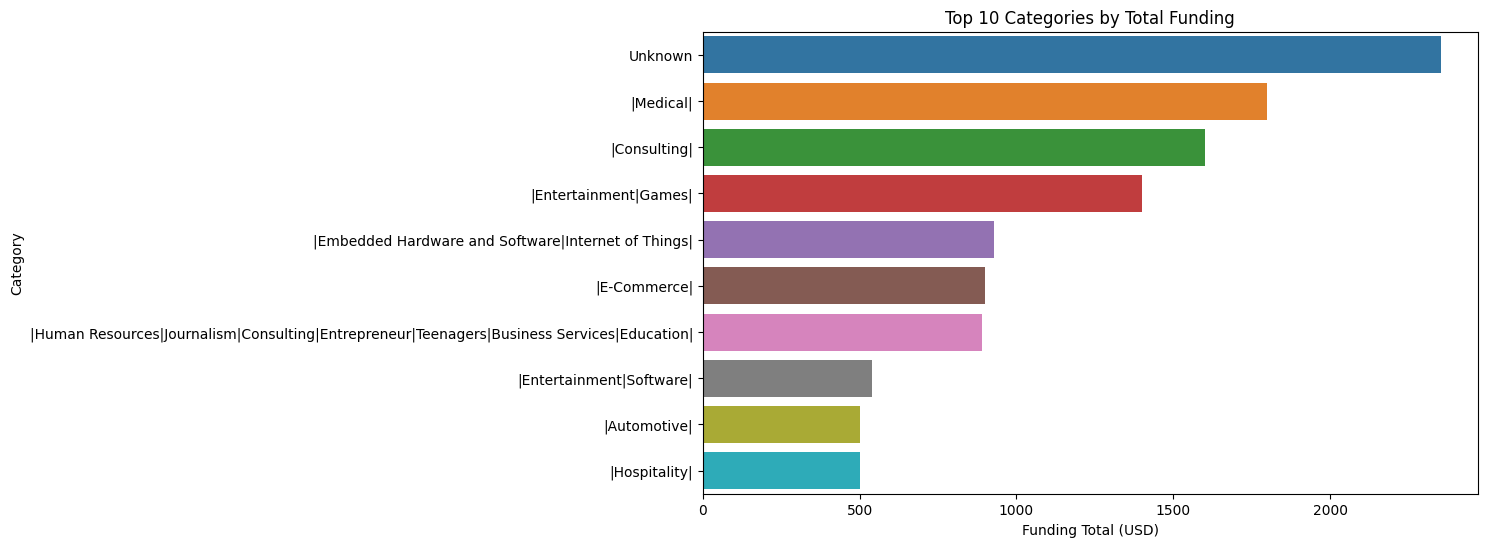

In [12]:
# Top categories by total funding
category_funding = df.groupby('category_list')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_funding.values, y=category_funding.index, hue=category_funding.index)
plt.title('Top 10 Categories by Total Funding')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Category')
plt.show()


**Insights:**

1. **Unknown Dominates Funding:** The "Unknown" category has the highest total funding, which indicates either a large portion of startups are not classified under a specific category.

2. **Medical and Consulting Categories Attract High Funding:**
   * Medical startups show significant funding, reflecting the growing investment interest in healthcare and life sciences sectors.
   * Consulting ranks high, suggesting strong investor confidence in startups providing business advisory or strategic solutions.

3. **Entertainment and Technology Categories Shine:** Categories like Entertainment (Games) and Embedded Hardware and Software | IoT suggest high funding for innovative technologies, especially in gaming, IoT, and related areas.

4. **Emerging Investment Areas:**
   * E-commerce, Education, and Business Services appear as promising sectors, demonstrating steady investor interest.
   * Startups in Automotive and Hospitality are also receiving notable attention, which might indicate innovation in mobility and travel industries.

5. **Diversity in Funding Across Sectors:** The chart shows that funding is not concentrated in one area but spans diverse industries, from entertainment and technology to traditional sectors like automotive and hospitality.

**Recommendations:**

1. **For Investors:**
   * Focus on Medical, Consulting, and Entertainment (Games) as they show strong funding trends.
   * Consider exploring underrepresented but emerging sectors like IoT and E-commerce.

2. **For Startups:**
   * Ensure accurate categorization when presenting funding data, as misclassification impacts visibility and insights.
   * Position yourself in high-growth sectors like Medical, Gaming, or IoT to attract more funding.

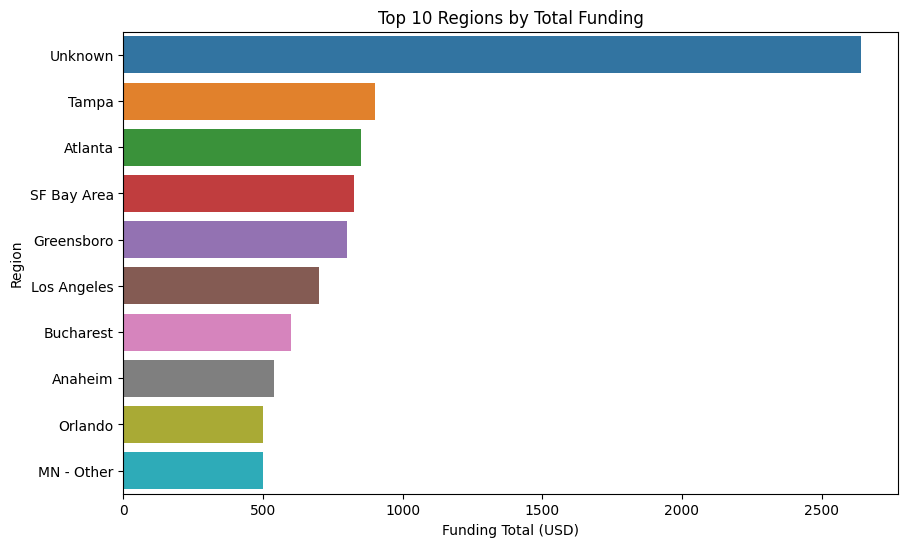

In [13]:
# Funding distribution by region
region_funding = df.groupby('region')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_funding.values, y=region_funding.index, hue=region_funding.index)
plt.title('Top 10 Regions by Total Funding')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Region')
plt.show()

**Insights:**

1. **Unknown Region Dominates:** The "Unknown" region has the highest funding, which may indicate missing or improperly recorded data. This limits the ability to draw meaningful insights about the regions with the most funding.

2. **Tampa and Atlanta Lead:** Tampa and Atlanta rank high in total funding, showcasing strong startup ecosystems and active investment climates in these regions.

3. **SF Bay Area as a Major Hub:** The San Francisco Bay Area continues to be a major player in the startup scene, which aligns with its reputation as a global hub for technology and innovation.

4. **Emerging Regions:**
    * Cities like Greensboro, Los Angeles, and Bucharest demonstrate promising growth, indicating expanding opportunities beyond traditional tech hubs.
    * Regions like Anaheim, Orlando, and MN - Other are also receiving notable funding, which suggests emerging ecosystems worth exploring further.

**Recommendations:**

1. **For Investors:**
   * Focus investments on regions like Tampa, Atlanta, and SF Bay Area, as they show significant funding activity and likely have a well-established startup ecosystem.
   * Explore emerging hubs like Bucharest and Greensboro, which may offer cost-effective opportunities with untapped potential.

2. **For Startups:**
   * Target Key Regions: Startups looking for funding should establish their presence or network in high-funding regions like Tampa, Atlanta, and SF Bay Area to increase visibility.
   * Leverage Emerging Markets: Startups in smaller regions such as Anaheim or Bucharest should highlight their unique value proposition to attract attention from investors.

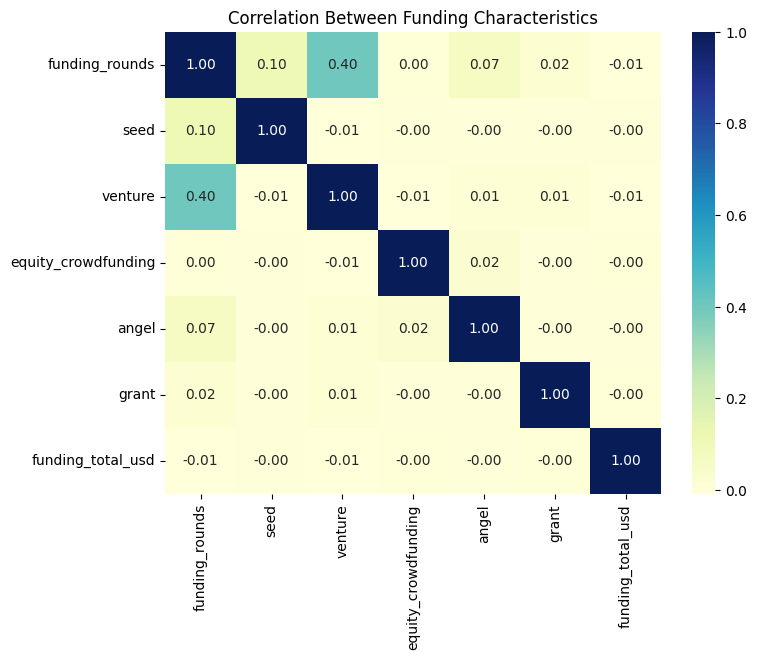

In [14]:
# Heatmap for correlation
corr_matrix = df[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding', 'angel', 'grant', 'funding_total_usd']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Between Funding Characteristics')
plt.show()

**Insights:**

1. **Strong Correlation:**
   * Funding Rounds and Venture: The correlation between funding rounds and venture funding is moderate (0.40). This suggests that startups receiving venture funding tend to go through more funding rounds.
   * This could indicate that venture-funded startups are likely to progress through multiple stages of funding as they grow and scale.

2. **Weak or No Correlation:**
   * Most variables, such as seed funding, equity crowdfunding, angel funding, and grants, show weak or negligible correlations with other funding characteristics and total funding (funding_total_usd).
   * This suggests that these types of funding may not significantly influence the total funding amount or the progression of funding rounds.

3. **Independence of Total Funding:**
   * Total funding (funding_total_usd) shows a negligible correlation with all other variables. This indicates that total funding might depend on external factors not captured in this dataset, such as market conditions, startup industry, or investor-specific factors.

4. **Equity Crowdfunding Independence:**
   * Equity crowdfunding appears to operate independently of other funding characteristics, suggesting it might be a distinct funding mechanism with unique influencing factors.

**Recommendations:**

1. **For Investors:**
   * Focus on startups that attract venture funding, as these startups are likely to progress through multiple funding rounds and demonstrate sustained growth potential.
   * Evaluate startups for potential grant or angel funding opportunities based on criteria other than correlation with total funding, as these forms of funding are less connected to larger funding trends.

2. **For Startups:**
   * Startups seeking long-term funding should prioritize venture capital, as it is associated with a clear pathway to subsequent funding rounds.

3. **For Policymakers or Support Programs:**
   * Encourage diversification in funding types, especially for early-stage startups, by improving access to grants or angel investments.
   * Highlight the role of venture capital in supporting startups through multiple funding rounds, promoting initiatives to attract more venture investors.

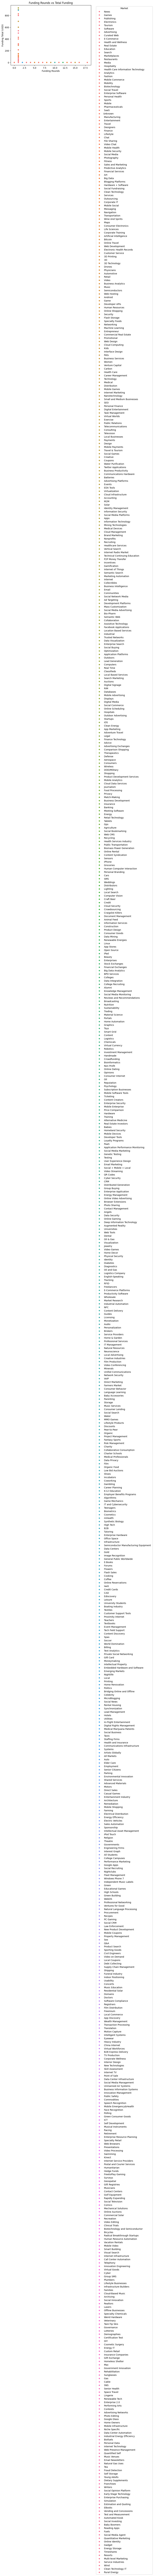

In [15]:
# Scatter plot: Funding rounds vs. total funding
sns.scatterplot(data=df, x='funding_rounds', y='funding_total_usd', hue='market')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Market')
plt.title("Funding Rounds vs Total Funding")
plt.xlabel("Funding Rounds")
plt.ylabel("Funding Total (USD)")
plt.show()

**Insights:**

1. **Concentration at Low Rounds**:
   * Most startups have a low number of funding rounds, with a significant concentration around 1-2 rounds.
   * This suggests that many startups either do not progress beyond early funding stages or secure sufficient funding early on.

2. **Funding Amounts**:
   * The funding amounts appear to be relatively low across most rounds, indicating that startups might be receiving smaller investments per round.
   * There are a few outliers with higher funding, but they are not common.

3. **Outliers**:
   * A few data points show higher funding amounts, which could represent successful startups or those in high-demand sectors.

**Recommendations:**

1. **Focus on Early Rounds**:
   * Startups should optimize their strategies for early funding rounds, as this is where most activity occurs.
   * Emphasize strong pitches and clear business models to attract early investors.

2. **Sector Analysis**:
   * Investigate which sectors the outliers belong to, as these might indicate high-growth or high-interest areas for investors.

3. **Investor Engagement**:
   * Encourage startups to engage with investors early and often, as securing funding in initial rounds is crucial for growth.

4. **Funding Strategy**:
   * Consider diversifying funding sources to increase the total funding amount, especially for startups stuck in early rounds.

In [16]:
import plotly.express as px

# Aggregate funding by country
country_funding = df.groupby('country_code')['funding_total_usd'].sum().reset_index()
country_funding['funding_total_usd'] = pd.to_numeric(country_funding['funding_total_usd'], errors='coerce')
fig = px.choropleth(country_funding,
                    locations='country_code',
                    color='funding_total_usd',
                    hover_name='country_code',
                    title='Funding Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


**Insights:**
1. **Dominant Funding Regions:**
   * The United States is highlighted as a dominant region, indicating it receives significantly higher funding compared to other countries.
   * Western Europe and parts of Asia show moderate funding intensity, suggesting these regions are key players in the global startup ecosystem.

2. **Underrepresented Regions:**
   * Africa, South America, and parts of Eastern Europe exhibit lower funding levels. These regions might lack mature startup ecosystems or face challenges such as economic conditions or investor confidence.

3. **Funding Disparities:**
   * The funding landscape reveals a clear concentration in developed economies, reflecting a disparity where startups in emerging markets receive comparatively less funding.

**Recommendations:**
1. **Encourage Regional Investment:**
   * Investors and policymakers can focus on building startup ecosystems in underrepresented regions (e.g., Africa, South America) by offering grants, tax benefits, or infrastructure support.

2. **Collaborative Opportunities:**
   * High-performing regions (e.g., the U.S. or Europe) can collaborate with emerging markets through partnerships, accelerators, or venture capital expansions to share expertise and resources.

3. **Target Growth in Promising Markets:**
   * Moderate funding regions like parts of Asia or Eastern Europe could be targeted by investors for untapped potential in sectors like technology, fintech, or healthcare.

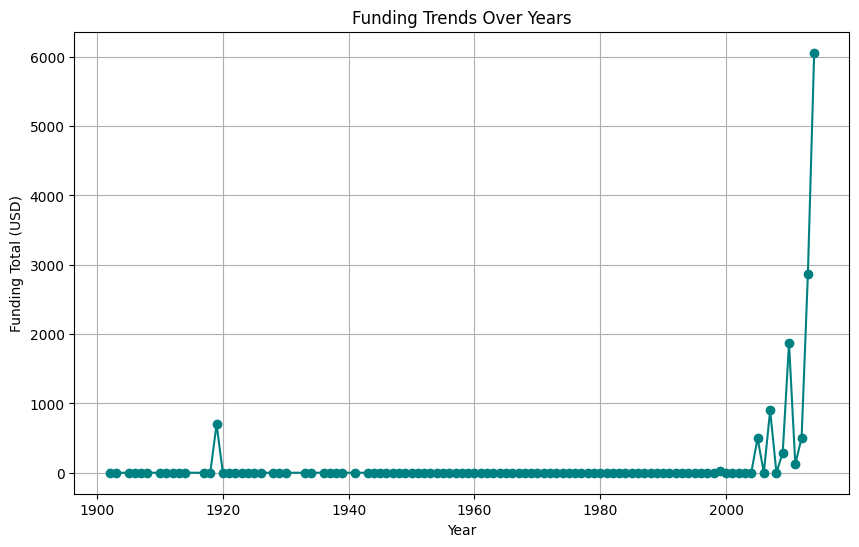

In [17]:
# Funding over years
funding_over_years = df.groupby('founded_year')['funding_total_usd'].sum()
plt.figure(figsize=(10, 6))
funding_over_years.plot(kind='line', marker='o', color='teal')
plt.title('Funding Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Funding Total (USD)')
plt.grid()
plt.show()

**Insights:**
1. **Exponential Growth in Funding:**
   * Funding activity remained relatively flat for most of the 20th century, with negligible investment levels.
   * A sharp increase in funding is observed after the year 2000, particularly post-2010, indicating a surge in startup investments and interest in innovation-driven industries.

2. **Current Investment Era:**
   * The most recent data points indicate the peak of investments, suggesting a highly competitive funding environment and a robust ecosystem for startups.

**Recommendations:**
1. **Diversify Investments:**
   * Encourage investors to explore innovative but underfunded sectors to reduce over-concentration in saturated markets.

2. **Prepare for Market Cycles:**
   * Stakeholders should be aware of potential market corrections or economic slowdowns and prepare for sustainable growth rather than over-dependence on external funding.

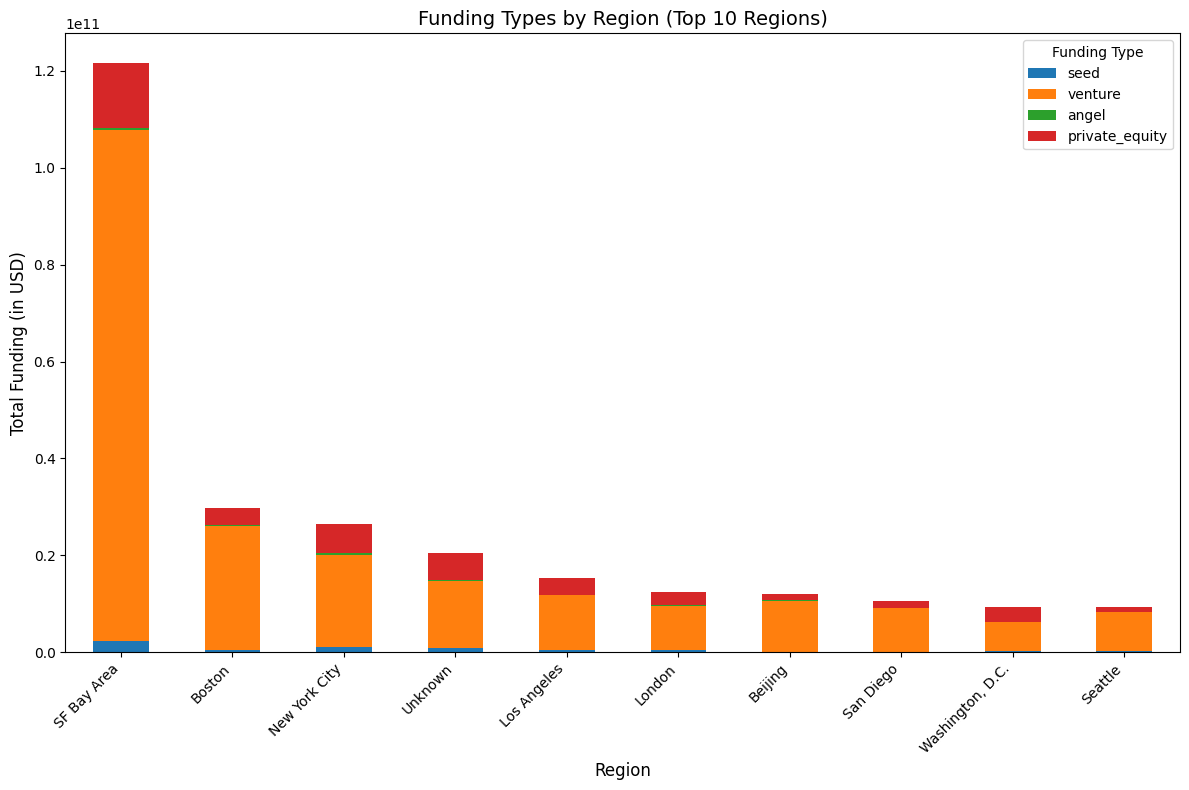

In [29]:
#Funding Type Analysis by Region
funding_by_region = df.groupby(['region'])[['seed', 'venture', 'angel', 'private_equity']].sum()
top_regions = funding_by_region.sum(axis=1).nlargest(10).index
funding_top_regions = funding_by_region.loc[top_regions]
funding_top_regions.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Funding Types by Region (Top 10 Regions)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Funding (in USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Funding Type")
plt.tight_layout()
plt.show()

**Insights:**

1. **SF Bay Area Dominance:**
   * The SF Bay Area leads by a massive margin in total funding, primarily driven by venture capital investments, indicating it remains the hub for startup activity globally.

2. **Top Regions with Significant Funding:**
   * Boston and New York City are notable contributors with considerable private equity and venture funding.
   * Regions such as Los Angeles, London, and Beijing also show steady funding activity but at lower levels compared to the SF Bay Area.

3. **Funding Type Distribution:**
   * Venture funding dominates across all regions, reflecting a preference for scaling high-potential startups.
   * Seed and angel investments form a very small proportion, suggesting fewer early-stage investments compared to growth-stage or mature startups.

4. **Global Representation:**
   * While the top regions are predominantly in the U.S., there is international representation (e.g., London and Beijing), showing that startup ecosystems are thriving in other parts of the world.

**Recommendations:**

1. **Encourage Early-Stage Funding:**
   * Promote seed and angel investment opportunities in regions with emerging startup ecosystems to encourage more grassroots innovation.

2. **Global Diversification:**
   * Investors could explore opportunities outside the SF Bay Area, such as in London, Beijing, or other rising regions, to reduce geographical concentration risks.

3. **Support for Undervalued Regions:**
   * Stakeholders in regions not listed (beyond the top 10) should focus on building supportive startup ecosystems, including incubators, accelerators, and industry partnerships.

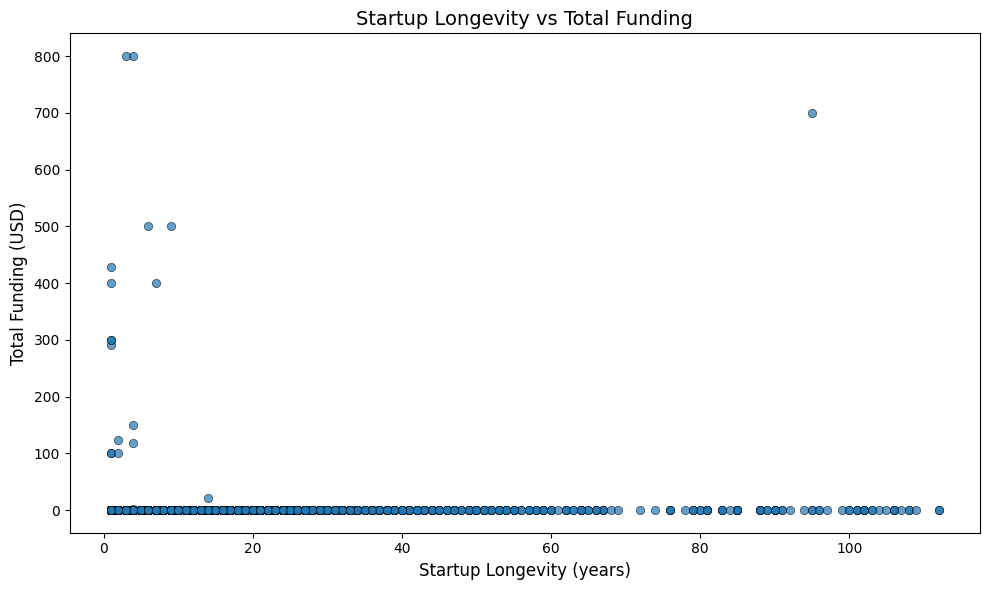

In [36]:
#Startup Longevity and Funding Success
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df = df.dropna(subset=['last_funding_at'])
df['founded_year'] = pd.to_numeric(df['founded_year'], errors='coerce')
df = df.dropna(subset=['founded_year'])  # Drop rows where 'founded_year' is NaN
df['longevity'] = df['last_funding_at'].dt.year - df['founded_year']
df = df[df['longevity'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longevity'],
    y=df['funding_total_usd'],
    alpha=0.7,
    edgecolor='k'
)
plt.title("Startup Longevity vs Total Funding", fontsize=14)
plt.xlabel("Startup Longevity (years)", fontsize=12)
plt.ylabel("Total Funding (USD)", fontsize=12)
plt.tight_layout()
plt.show()

**Insights:**

1. **Concentration of Young Startups**:
   * Most startups are clustered at the lower end of the longevity axis, indicating they are relatively young.

2. **Funding Distribution**:
   * A few young startups have received significant funding, as indicated by the outliers with high funding amounts.
   * Older startups generally show lower funding levels, which might indicate they are self-sustaining or less reliant on external funding.

**Recommendations:**

1. **Focus on Early-Stage Support**:
   * Given the concentration of young startups, consider providing resources and support tailored to early-stage companies.
   * Encourage mentorship and networking opportunities to help them scale.

2. **Identify High-Growth Sectors**:
   * Investigate the sectors or characteristics of the outliers with high funding to identify high-growth opportunities.


**Overall Insights:**

1. **Geographical Concentration of Funding:**
   * The majority of startup funding is concentrated in a few key regions, especially the **United States**. The **SF Bay Area**, Boston, and New York City are the most dominant regions globally.

2. **Funding Trends Over Time:**
   * The timeline graph indicates that startup funding has **exploded in recent years**, especially post-2000, reflecting the rise of technology-driven industries and the startup culture globally.

3. **Funding Type Dominance:**
   * **Venture capital** is the predominant funding type in top regions, signifying a focus on scaling and growth-stage startups rather than early-stage (seed) funding.

4. **Global Ecosystem Imbalance:**
   * Although countries outside the U.S. like **China (Beijing)** and **UK (London)** show significant funding activity, there is a notable gap between the U.S. and other countries in terms of total funding volume.

5. **Regional Preferences for Funding Types:**
   * Different regions show variations in funding type composition. For instance, private equity is more prominent in Boston, while venture capital is the primary driver in SF Bay Area and other regions.

**Overall Recommendations:**

1. **Foster Early-Stage Funding:**
   * Policymakers and investors should focus on increasing **seed and angel investments** in regions outside the dominant hubs (SF Bay Area, Boston, etc.) to support startups in their formative stages.

2. **Promote Ecosystem Growth Globally:**
   * International regions (e.g., Europe, Asia) should focus on creating supportive policies, accelerators, and funding networks to close the gap with the U.S. in total funding distribution.

3. **Encourage Funding Diversification:**
   - Investors should diversify their portfolios geographically and sector-wise, tapping into opportunities in underrepresented regions (e.g., Africa, Southeast Asia) with growing startup ecosystems.

4. **Sustainability in the Funding Boom:**
   * Given the rapid rise in funding post-2000, stakeholders must evaluate sustainability. Ensuring that startups receiving funding have strong business models is crucial to avoid market bubbles.

5. **Leverage Regional Expertise:**
   * Emerging regions like London and Beijing can align their funding efforts with regional strengths (e.g., fintech in London, AI/tech in Beijing) to build globally competitive ecosystems.